In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
X = iris['data'][:, (2, 3)] #petal length, petal width
y = (iris['target'] == 2).astype(np.float64)  #represent instances == 2 as 1, and others as 0

In [15]:
svm_clf = Pipeline([
    ("scalar", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])
svm_clf.fit(X, y)

Pipeline(steps=[('scalar', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [16]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

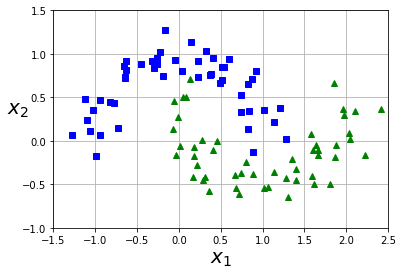

In [38]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [44]:
lin_svm_clf = Pipeline([
#("poly_features", PolynomialFeatures(degree=3)),
("scaler", StandardScaler()),
("svm_clf", LinearSVC(C=10, loss="hinge"))
])
lin_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [49]:
poly_svm_clf = Pipeline([
("poly_features", PolynomialFeatures(degree=3)),
("scaler", StandardScaler()),
("svm_clf", LinearSVC(C=10, loss="hinge"))
])
poly_svm_clf.fit(X, y)

c:\users\mehrshad\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [45]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)


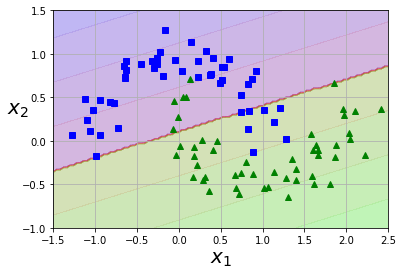

In [46]:
plot_predictions(lin_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

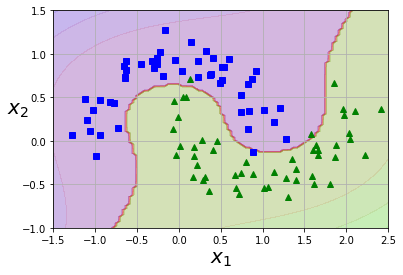

In [50]:
plot_predictions(poly_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()